In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#load dataset
train = pd.read_csv("train.csv")
store = pd.read_csv("stores.csv")
feature = pd.read_csv("features.csv")

In [3]:
# A brief look at the train dataset
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
# A brief look at the store dataset
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
# A brief look at the feature dataset
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
#find out the shape of dataset
print('train: ', train.shape)
print('feature: ', feature.shape)
print('stores ', store.shape)


train:  (421570, 5)
feature:  (8190, 12)
stores  (45, 3)


In [7]:
#Merge three csv files using inner join.
df = train.merge(feature, on=['Store', 'Date'], how='inner').merge(store, on=['Store'], how='inner')
print(df.shape)
df.head()

(421570, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [8]:
#Remove additional IsHoliday column (IsHoliday_y) and rename IsHoliday_x column to IsHoliday.
df = df.drop(['IsHoliday_y','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis=1)
df = df.rename(columns={'IsHoliday_x':'IsHoliday'})
df.columns


Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [9]:
#shape of dataframe created
df.shape

(421570, 11)

In [10]:
#check for null values
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [11]:
#summary of dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
CPI,421570.0,171.201947,39.159276,126.064,132.022667,182.31878,212.416993,227.232807
Unemployment,421570.0,7.960289,1.863296,3.879,6.891000,7.86600,8.572000,14.313000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000


In [12]:
#nformation of dataframe regarding data type and null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   CPI           421570 non-null  float64
 8   Unemployment  421570 non-null  float64
 9   Type          421570 non-null  object 
 10  Size          421570 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(2)
memory usage: 35.8+ MB


# Exploratory Data Analysis

Text(0.5, 1.0, '45 stores weekly sales')

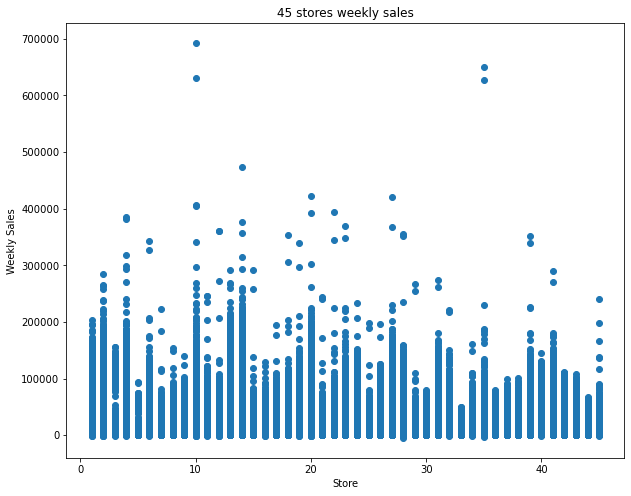

In [13]:
#45 stores weekly sales
fig = plt.figure(figsize =(10, 8))
plt.scatter(df.Store, df.Weekly_Sales)
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('45 stores weekly sales')

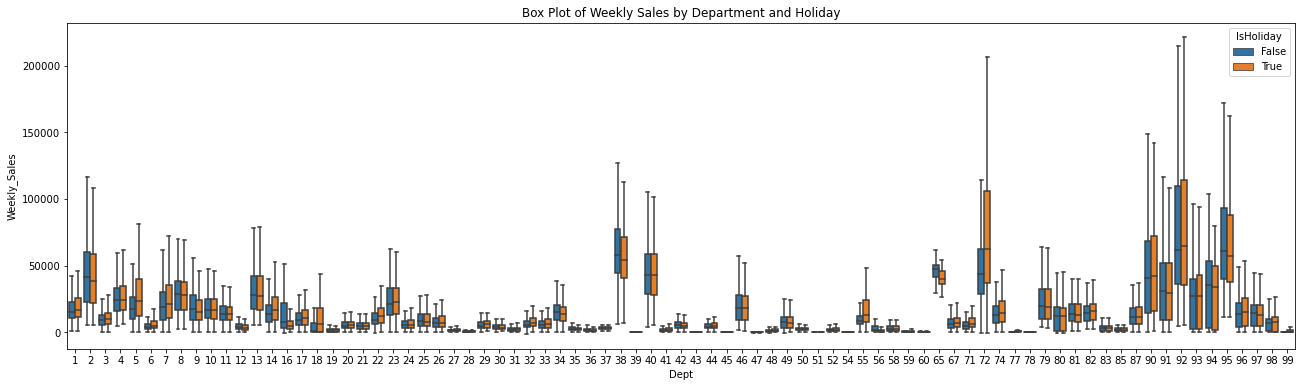

In [14]:
#weekly sales of department and holiday
data= pd.concat([df['Dept'], df['Weekly_Sales'], df['IsHoliday']], axis=1)
plt.figure(figsize=(22,6))
plt.title('Box Plot of Weekly Sales by Department and Holiday')
fig = sns.boxplot(x='Dept', y='Weekly_Sales', data=data, showfliers=False, hue="IsHoliday")

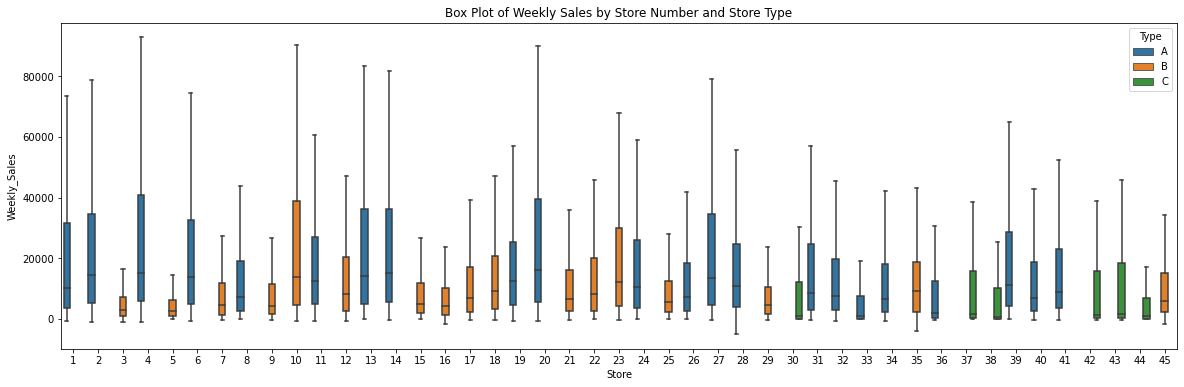

In [15]:
#Plot of Weekly Sales by Store Number and Store Type.
data_8 = pd.concat([df['Store'], df['Weekly_Sales'], df['Type']], axis=1)
plt.figure(figsize=(20,6))
plt.title('Box Plot of Weekly Sales by Store Number and Store Type')
fig = sns.boxplot(x='Store', y='Weekly_Sales', data=data_8, showfliers=False, hue='Type')

Text(0.5, 1.0, 'Weekly sales as per department')

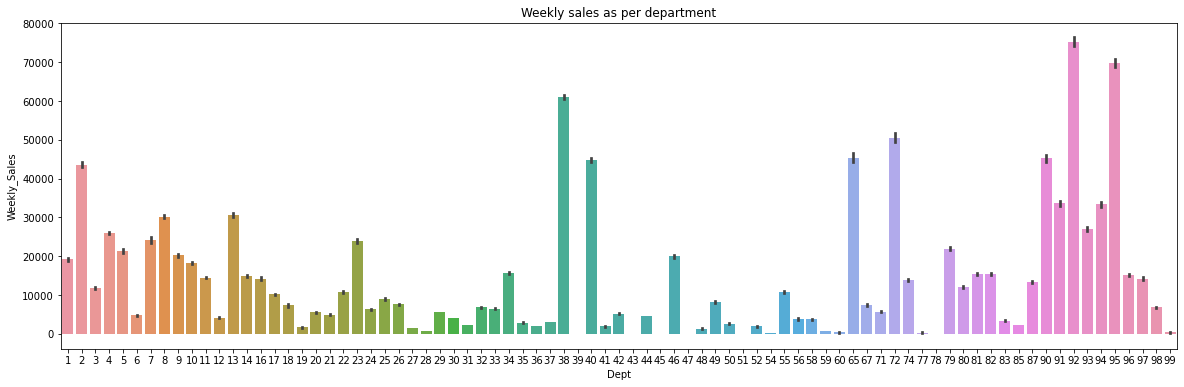

In [16]:
#Sales as per dept
fig = plt.figure(figsize =(20,6))
sns.barplot(x='Dept', y='Weekly_Sales', data=df)
plt.title('Weekly sales as per department')

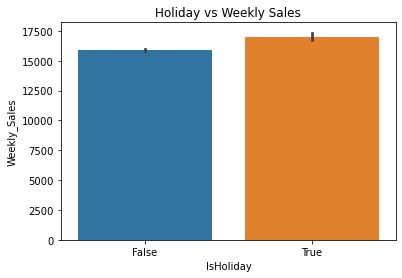

In [17]:
#holiday vs weekly sales
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)
plt.title('Holiday vs Weekly Sales')
plt.show()

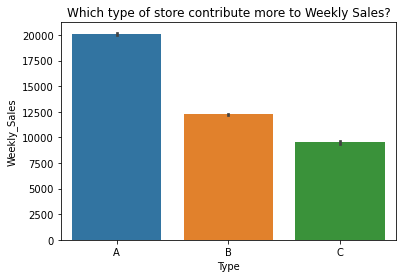

In [18]:
#store type vs weekly sales 
sns.barplot(x='Type', y='Weekly_Sales', data=df)
plt.title('Which type of store contribute more to Weekly Sales?')
plt.show()

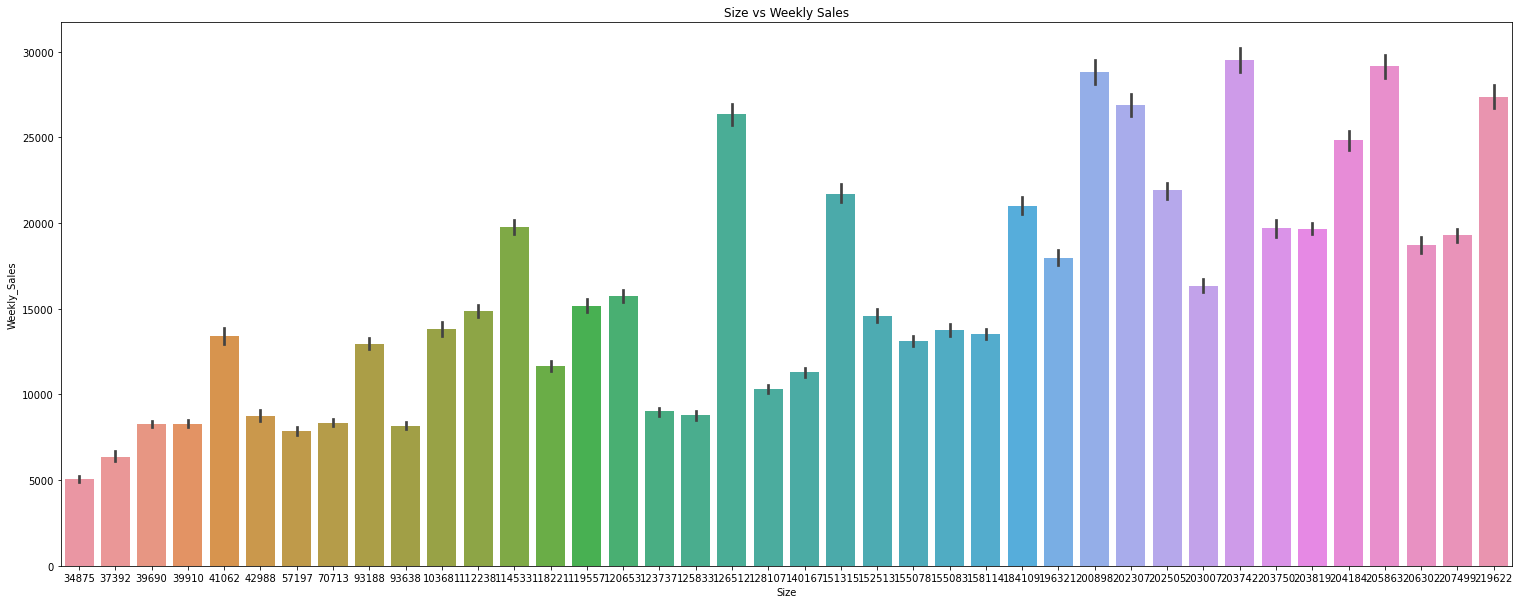

In [19]:
#size vs weekly sales
fig = plt.figure(figsize =(26,10))
sns.barplot(x='Size', y='Weekly_Sales', data=df)
plt.title('Size vs Weekly Sales')
plt.show()

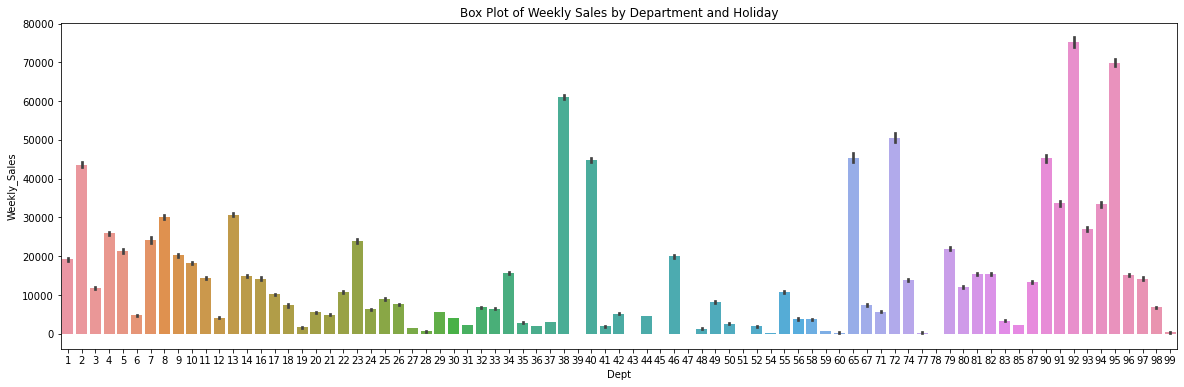

In [20]:
#weekly sales by holiday & dept
data= pd.concat([df['Dept'], df['Weekly_Sales'], df['IsHoliday']], axis=1)
plt.figure(figsize=(20,6))
plt.title('Box Plot of Weekly Sales by Department and Holiday')
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=data)

<ipython-input-21-811b4a157c20>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week']  = df.Date.dt.week


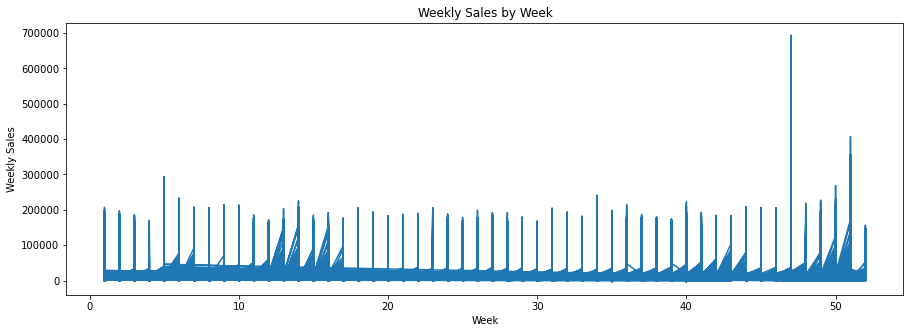

In [21]:
# First we need to get Year, Month and Week columns from Date column.
df.Date = pd.to_datetime(df.Date)
df['Year']  = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Week']  = df.Date.dt.week

#Plot of Weekly Sales and Week.
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Week')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.plot(df.Week,df.Weekly_Sales)
plt.show()

In [22]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5


# **Data preprocessing**

In [23]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
Year            0
Month           0
Week            0
dtype: int64

In [24]:
# Remove rows with null values in all columns
df.dropna(axis=0, how="all", inplace=True)
# Remove all rows with null values in all rows
df.dropna(axis=1, how="all", inplace=True)
# Fill missing values with 0
df=df.fillna(0)

In [25]:
#check for null values
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
Year            0
Month           0
Week            0
dtype: int64

In [26]:
# Remove negative values as sales cannot be negative values.
df= df[df['Weekly_Sales'] >= 0]
df.shape

(420285, 14)

<AxesSubplot:>

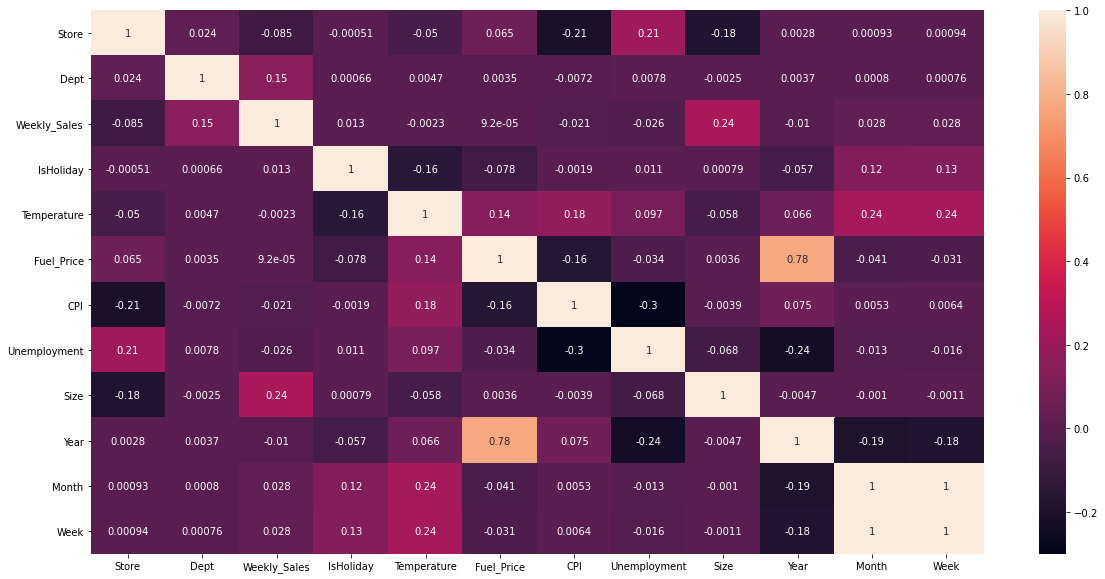

In [27]:
#heatmap to find out correlation b/w attributes
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),annot=True)

# Time Series Modelling

In [28]:
# It is necessary to have the date columns present in the dataset to be available in the datetime format as in ARIMA model it is required to see the sales values in date-wise fashion.
# Hence converting the string formatted Date into datetime format.
df.Date = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df.Date
df = df.drop('Date', axis=1)
df = df.resample('MS').mean() # Resmapling the time series data with month starting first.

<AxesSubplot:xlabel='Date'>

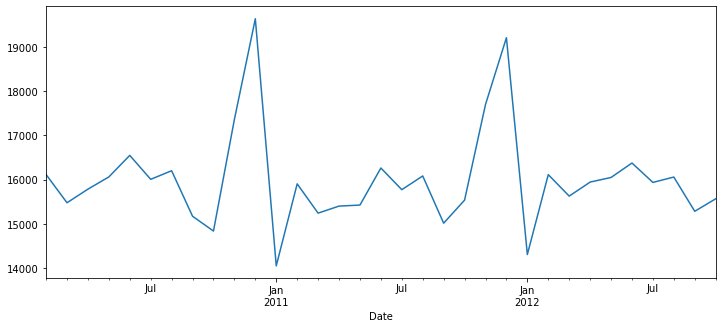

In [29]:
#weekly sales with respect to date as index
df['Weekly_Sales'].plot(figsize=(12,5))

In [30]:
# Train-Test splitting of time series data
train_data = df[:int(0.7*(len(df)))]
test_data = df[int(0.7*(len(df))):]
print('Train data:\n')
print(train_data.tail())
print('='*50,'\n')
print('Test data:\n')
print(test_data.head())
print('Train:', train_data.shape)
print('Test:', test_data.shape)


Train data:

                Store       Dept  Weekly_Sales  IsHoliday  Temperature  \
Date                                                                     
2011-08-01  22.242006  44.356613  16082.682055   0.000000    79.810086   
2011-09-01  22.207410  44.091774  15013.965477   0.200612    72.491448   
2011-10-01  22.147677  44.216090  15536.033513   0.000000    60.285056   
2011-11-01  22.164828  44.374295  17700.949518   0.254022    49.549289   
2011-12-01  22.178926  44.644548  19211.934999   0.199066    40.162278   

            Fuel_Price         CPI  Unemployment           Size    Year  \
Date                                                                      
2011-08-01    3.699652  171.442253      8.052652  136949.137802  2011.0   
2011-09-01    3.648625  171.864840      8.047771  136920.280761  2011.0   
2011-10-01    3.524900  172.568586      7.763311  136511.822313  2011.0   
2011-11-01    3.484023  172.975990      7.764858  136616.262360  2011.0   
2011-12-01    3.33

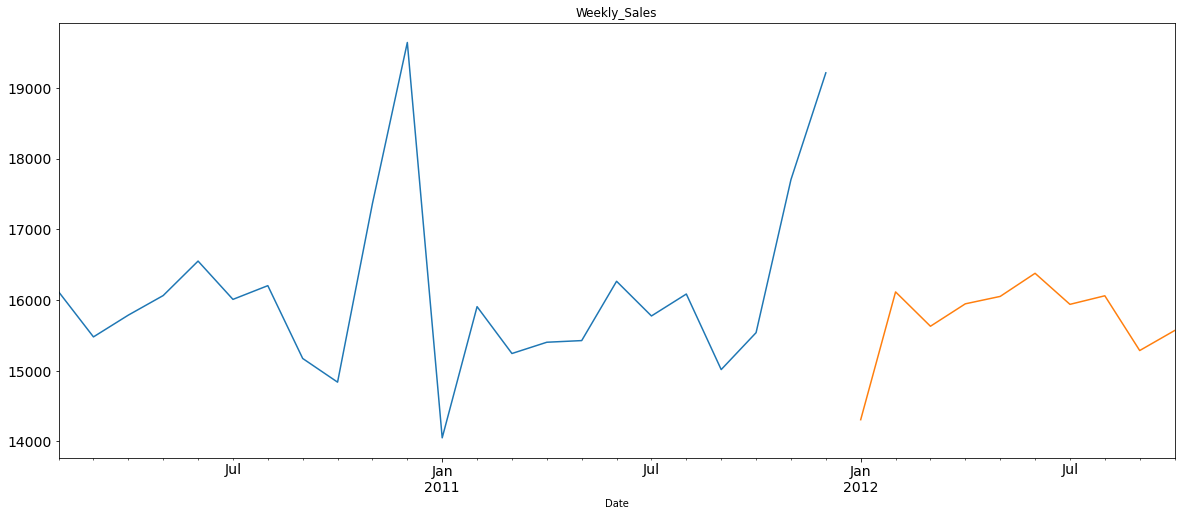

In [31]:
# ARIMA takes univariate data.
train_data = train_data['Weekly_Sales']
test_data = test_data['Weekly_Sales']
# Plot of Weekly_Sales with respect to years in train and test.
train_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()


<Figure size 1440x432 with 0 Axes>

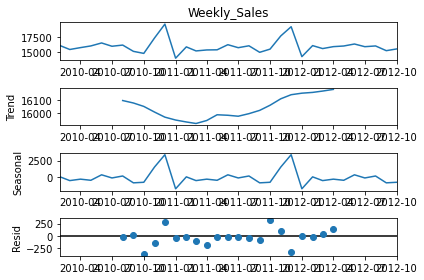

In [32]:
# Decomposition of time series data. It is necessary to see whether the trend, seasonality and residual are present in data or not.
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Weekly_Sales'], model='additive')
plt.figure(figsize=(20,6))
result.plot()
plt.show()

In [33]:
# A check of sationarity of data using Dicky-Fuller test.
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Weekly_Sales'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -4.173916935101493
p-value: 0.0007291844915317644
Critical Values:
	1%: -3.769732625845229
	5%: -3.005425537190083
	10%: -2.6425009917355373


In [34]:
# auto_arima model on train data.
from pmdarima.arima import auto_arima
model_auto_arima = auto_arima(train_data, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=10, max_q=10, max_P=10, max_Q=10, seasonal=True,
                  stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data)


 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=398.029, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=399.604, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=399.318, Time=0.17 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=399.847, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=401.739, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=404.410, Time=0.04 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=400.484, Time=0.10 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=399.862, Time=0.34 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=399.812, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=403.489, Time=0.19 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=405.580, Time=0.08 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=402.547, Time=0.27 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   :

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

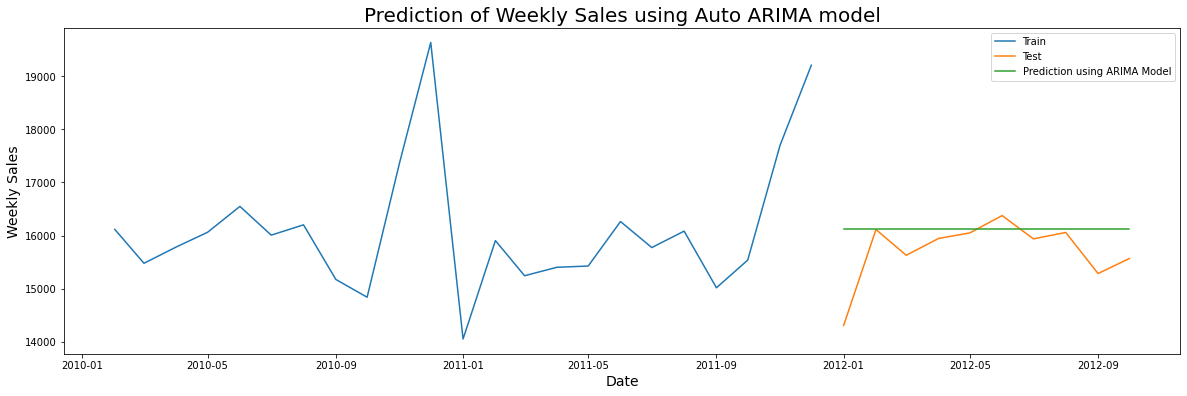

              Prediction
Date                    
2012-01-01  16121.961795
2012-02-01  16121.961795
2012-03-01  16121.961795
2012-04-01  16121.961795
2012-05-01  16121.961795


In [35]:
# Predict the test values
forecast = model_auto_arima.predict(n_periods=len(test_data))
forecast = pd.DataFrame(forecast,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using Auto ARIMA model', fontsize=20)
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(forecast, label='Prediction using ARIMA Model')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()
print(forecast.head())


In [36]:
# Performance metric for ARIMA model -MSE/RMSE
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('Mean Squared Error (MSE) of ARIMA: ', mean_squared_error(test_data, forecast))
print('Root Mean Squared Error (RMSE) of ARIMA: ', math.sqrt(mean_squared_error(test_data, forecast)))
print('Mean Absolute Deviation (MAD) of ARIMA: ', mean_absolute_error(test_data, forecast))

Mean Squared Error (MSE) of ARIMA:  469971.08318421
Root Mean Squared Error (RMSE) of ARIMA:  685.5443699602602
Mean Absolute Deviation (MAD) of ARIMA:  446.99385005215555


# Machine Learning Models

In [37]:
test_data.head()

Date
2012-01-01    14304.774064
2012-02-01    16112.853323
2012-03-01    15626.987004
2012-04-01    15944.188683
2012-05-01    16049.064164
Freq: MS, Name: Weekly_Sales, dtype: float64

In [38]:
#merge the 3 csv files to make a test dataset
test_data = pd.read_csv('test.csv')
test_stores = pd.merge(test_data,store,how='outer')
test = pd.merge(test_stores,feature,how='outer')
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1.0,2012-11-02,False,A,151315.0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2.0,2012-11-02,False,A,151315.0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3.0,2012-11-02,False,A,151315.0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4.0,2012-11-02,False,A,151315.0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5.0,2012-11-02,False,A,151315.0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [39]:
#Numeric Encoding
# Converting Categorical Variable 'Type' & 'IsHoliday' into Numerical Variables.
code_numeric = {"A": 1,"B": 2,"C": 3,False: 0,True: 1}
df = df.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
test = test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)

In [40]:
#Train-test split data
from sklearn.model_selection import train_test_split

y = df['Weekly_Sales']
X = df.drop(['Weekly_Sales'], axis='columns')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # Train:Test = 70:30 splitting.
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.3) #Train:CV = 70:30 splitting.

In [41]:
#Random Forest Regressor model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [42]:
#Evaluation parameters of Random Forest Regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Random Forest Regressor")
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_Score:",r2_score(y_test,y_pred))

Random Forest Regressor
MAE: 993.9593324287164
MSE: 2101222.421354515
RMSE: 1449.559388695239
r2_Score: 0.18079352796435366


In [43]:
#Decision Tree Regressor model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Regressor")
print("MAE:",mean_absolute_error(y_test,y_pred_dt))
print("MSE:",mean_squared_error(y_test,y_pred_dt))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_dt)))
print("r2_Score:",r2_score(y_test,y_pred_dt))

Decision Tree Regressor
MAE: 722.8043053284591
MSE: 1013212.4946966495
RMSE: 1006.5845690733837
r2_Score: 0.6049774527592304


In [44]:
#knn Regressor model
knn = KNeighborsRegressor(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Regressor")
print("MAE:",mean_absolute_error(y_test,y_pred_knn))
print("MSE:",mean_squared_error(y_test,y_pred_knn))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_knn)))
print("r2_Score:",r2_score(y_test,y_pred_knn))

KNN Regressor
MAE: 998.7607106929393
MSE: 2754360.89391497
RMSE: 1659.6267333093217
r2_Score: -0.07384646560286101


In [45]:
#Linear Regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression")
print("MAE:",mean_absolute_error(y_test,y_pred_lr))
print("MSE:",mean_squared_error(y_test,y_pred_lr))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print("r2_Score:",r2_score(y_test,y_pred_lr))

Linear Regression
MAE: 1121.1483406488856
MSE: 1810877.4916637067
RMSE: 1345.6884823998855
r2_Score: 0.2939907045736332


----